<a href="https://colab.research.google.com/github/ybigsur5/Dicoding-Machine-Learning/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Samuel_A_Bhasarie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [27]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import library untuk model klasifikasi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

# Import library untuk menyimpan model
import joblib

---

## **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [28]:
# Memuat dataset hasil clustering
try:
    df = pd.read_csv("hasil_clustering.csv")
except FileNotFoundError:
    print("Error: File 'hasil_clustering.csv' not found. Please make sure the file is in the correct directory.")
    # Create a dummy dataframe for demonstration if the file is not found
    data = {
        'TransactionAmount': np.random.randn(2400),
        'TransactionDate': pd.to_datetime(pd.date_range('2023-01-01', periods=2400, freq='H')),
        'TransactionType': np.random.choice(['Debit', 'Credit'], 2400),
        'Location': np.random.choice([f'Location_{i}' for i in range(50)], 2400),
        'Channel': np.random.choice(['ATM', 'Online', 'Branch'], 2400),
        'CustomerAge': np.random.randint(18, 70, 2400),
        'CustomerOccupation': np.random.choice(['Student', 'Engineer', 'Doctor', 'Teacher'], 2400),
        'TransactionDuration': np.random.randn(2400),
        'LoginAttempts': np.random.randint(1, 5, 2400),
        'AccountBalance': np.random.randn(2400) * 1000,
        'PreviousTransactionDate': pd.to_datetime(pd.date_range('2024-01-01', periods=2400, freq='H')),
        'Cluster': np.random.randint(0, 2, 2400).astype(float)
    }
    df = pd.DataFrame(data)


# Menampilkan 5 baris pertama untuk memastikan dataset termuat dengan benar
print("5 baris pertama dataset:")
display(df.head())

# Menampilkan informasi dasar dataset
print("\nInformasi dataset:")
df.info()

# Menampilkan statistik deskriptif dataset
print("\nStatistik deskriptif dataset:")
display(df.describe())

# Menampilkan jumlah nilai yang hilang (NaN) per kolom
print("\nJumlah nilai yang hilang per kolom:")
display(df.isnull().sum())

5 baris pertama dataset:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,-0.971275,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,-0.552443,1,-0.000537,2024-11-04 08:08:08,0.0
1,0.269440,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,0.305314,1,2.216472,2024-11-04 08:09:35,0.0
2,-0.586882,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,-0.909842,1,-1.023534,2024-11-04 08:07:04,1.0
3,-0.387456,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,-1.353017,1,0.885797,2024-11-04 08:09:06,1.0
4,-0.973468,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,1.120184,1,0.593589,2024-11-04 08:06:39,1.0



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2512 non-null   float64
 1   TransactionDate          2512 non-null   object 
 2   TransactionType          2512 non-null   object 
 3   Location                 2512 non-null   object 
 4   Channel                  2512 non-null   object 
 5   CustomerAge              2512 non-null   int64  
 6   CustomerOccupation       2512 non-null   object 
 7   TransactionDuration      2512 non-null   float64
 8   LoginAttempts            2512 non-null   int64  
 9   AccountBalance           2512 non-null   float64
 10  PreviousTransactionDate  2512 non-null   object 
 11  Cluster                  2399 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 235.6+ KB

Statistik deskriptif dataset:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Cluster
count,2.512000e+03,2512.000000,2.512000e+03,2512.000000,2.512000e+03,2399.000000
mean,-1.386011e-16,44.673965,7.637203e-17,1.124602,4.561107e-17,0.492288
std,1.000199e+00,17.792198,1.000199e+00,0.602662,1.000199e+00,0.500045
min,-1.018657e+00,18.000000,-1.567456e+00,1.000000,-1.285344e+00,0.000000
25%,-7.390118e-01,27.000000,-8.097706e-01,1.000000,-9.255845e-01,0.000000
50%,-2.961881e-01,45.000000,-1.021205e-01,1.000000,-9.712227e-02,0.000000
75%,4.006114e-01,59.000000,5.912336e-01,1.000000,6.575405e-01,1.000000
max,5.555266e+00,80.000000,2.578372e+00,5.000000,2.529043e+00,1.000000



Jumlah nilai yang hilang per kolom:


,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


---

## **3. Data Preprocessing**

Tahap Data Preprocessing bertujuan untuk menyiapkan dataset sebelum digunakan untuk melatih model. Langkah-langkah yang umum dilakukan meliputi penanganan nilai yang hilang, konversi tipe data, dan encoding fitur kategorikal.

In [29]:
# Hapus baris yang memiliki NaN pada kolom target 'Cluster'
df = df.dropna(subset=['Cluster'])

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Menghapus kolom target
y = df['Cluster']  # Kolom target yang akan diprediksi

# Menangani kolom datetime: konversi ke timestamp (numeric)
datetime_cols = ['TransactionDate', 'PreviousTransactionDate']
for col in datetime_cols:
    if col in X.columns:
        # Convert to numeric timestamp, handle potential errors
        X[col] = pd.to_numeric(pd.to_datetime(X[col], errors='coerce')).fillna(0) / 10**9


# Konversi fitur kategorikal ke numerik dengan Label Encoding
label_encoders = {}
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

for col in categorical_cols:
    if col in X.columns:
        le = LabelEncoder()
        # Fit and transform on the entire column before splitting to avoid unseen labels in test set
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # Simpan encoder jika diperlukan nanti

# Menampilkan tipe data setelah preprocessing
print("Tipe data setelah preprocessing:")
print(X.dtypes)

Tipe data setelah preprocessing:
TransactionAmount          float64
TransactionDate            float64
TransactionType              int64
Location                     int64
Channel                      int64
CustomerAge                  int64
CustomerOccupation           int64
TransactionDuration        float64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate    float64
dtype: object


---

## **4. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set). Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya.

In [30]:
# Membagi dataset menjadi training dan testing (80% : 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan ukuran data setelah splitting
print(f"Jumlah data latih: {X_train.shape[0]} sampel")
print(f"Jumlah data uji: {X_test.shape[0]} sampel")

Jumlah data latih: 1919 sampel
Jumlah data uji: 480 sampel


---

## **5. Membangun Model Klasifikasi**

Pada tahap ini, kita akan membangun dan melatih beberapa model klasifikasi.

### **a. Fungsi Evaluasi Model**

Kita akan membuat sebuah fungsi untuk memudahkan evaluasi performa model menggunakan metrik umum dan visualisasi confusion matrix.

In [31]:
# Function to evaluate the model with confusion matrix
def evaluate_model_with_confusion_matrix(model, X_test, y_test, model_name="Model"):
    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    # Use zero_division=0 to handle cases where a class has no predicted samples
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0) * 100

    # Display evaluation results
    print(f"🔹 Evaluasi {model_name}:")
    print(f"   - Akurasi    : {accuracy:.4f}%")
    print(f"   - Precision  : {precision:.4f}%")
    print(f"   - Recall     : {recall:.4f}%")
    print(f"   - F1-Score   : {f1:.4f}%")
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("-" * 50)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi confusion matrix
    plt.figure(figsize=(6,4))
    # Use sorted unique values from y_test as xticklabels and yticklabels
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

### **b. Membangun dan Melatih Model**

Kita akan melatih tiga model klasifikasi: Naïve Bayes, K-Nearest Neighbors (KNN), dan Decision Tree.

In [32]:
# ================== Naïve Bayes Classifier ==================
nb_model = GaussianNB()

start_time_nb = time.time()
nb_model.fit(X_train, y_train)
end_time_nb = time.time()

print(f"Naïve Bayes Training Time: {end_time_nb - start_time_nb:.4f} seconds")

# ================== K-Nearest Neighbors (KNN) ==================
knn_model = KNeighborsClassifier(n_neighbors=5)  # k = 5

start_time_knn = time.time()
knn_model.fit(X_train, y_train)
end_time_knn = time.time()

print(f"KNN Training Time: {end_time_knn - start_time_knn:.4f} seconds")

# ================== Decision Tree Classifier ==================
dt_model = DecisionTreeClassifier(random_state=42)

start_time_dt = time.time()
dt_model.fit(X_train, y_train)
end_time_dt = time.time()

print(f"Decision Tree Training Time: {end_time_dt - start_time_dt:.4f} seconds")

Naïve Bayes Training Time: 0.0047 seconds
KNN Training Time: 0.0038 seconds
Decision Tree Training Time: 0.0290 seconds


---

## **6. Evaluasi Model Klasifikasi**

Kita akan mengevaluasi performa ketiga model yang telah dilatih menggunakan data uji.

🔹 Evaluasi Naïve Bayes Classifier:
   - Akurasi    : 50.8333%
   - Precision  : 25.8403%
   - Recall     : 50.8333%
   - F1-Score   : 34.2634%

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      1.00      0.67       244
         1.0       0.00      0.00      0.00       236

    accuracy                           0.51       480
   macro avg       0.25      0.50      0.34       480
weighted avg       0.26      0.51      0.34       480

--------------------------------------------------


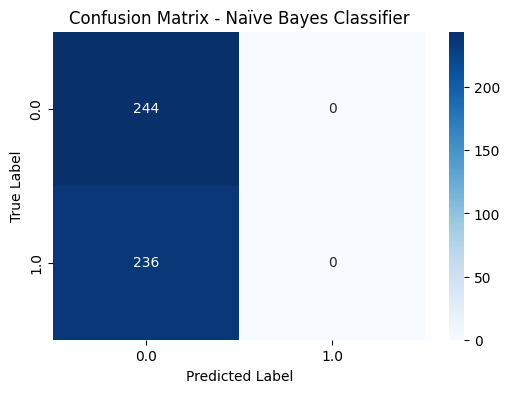

🔹 Evaluasi K-Nearest Neighbor (KNN):
   - Akurasi    : 53.7500%
   - Precision  : 53.7799%
   - Recall     : 53.7500%
   - F1-Score   : 53.7500%

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.53      0.54       244
         1.0       0.53      0.55      0.54       236

    accuracy                           0.54       480
   macro avg       0.54      0.54      0.54       480
weighted avg       0.54      0.54      0.54       480

--------------------------------------------------


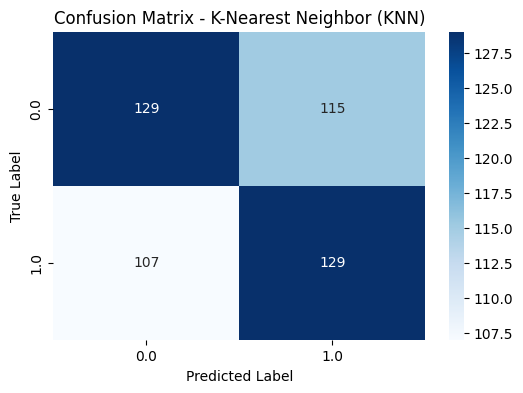

🔹 Evaluasi Decision Tree Classifier:
   - Akurasi    : 47.0833%
   - Precision  : 47.0905%
   - Recall     : 47.0833%
   - F1-Score   : 47.0861%

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.48      0.48       244
         1.0       0.46      0.47      0.46       236

    accuracy                           0.47       480
   macro avg       0.47      0.47      0.47       480
weighted avg       0.47      0.47      0.47       480

--------------------------------------------------


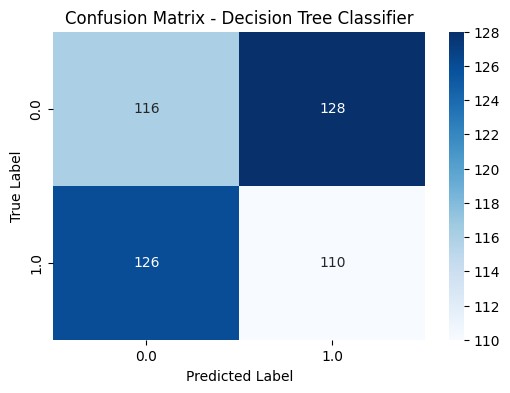

In [33]:
# Evaluasi model Naïve Bayes
evaluate_model_with_confusion_matrix(nb_model, X_test, y_test, model_name="Naïve Bayes Classifier")

# Evaluasi model KNN
evaluate_model_with_confusion_matrix(knn_model, X_test, y_test, model_name="K-Nearest Neighbor (KNN)")

# Evaluasi model Decision Tree
evaluate_model_with_confusion_matrix(dt_model, X_test, y_test, model_name="Decision Tree Classifier")

---

## **7. Perbandingan Performa Model Awal**

Berdasarkan hasil evaluasi awal, kita akan membandingkan performa ketiga model sebelum dilakukan hyperparameter tuning.

In [34]:
# Calculate metrics for comparison
nb_y_pred = nb_model.predict(X_test)
knn_y_pred = knn_model.predict(X_test)
dt_y_pred = dt_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_y_pred) * 100
nb_precision = precision_score(y_test, nb_y_pred, average='weighted', zero_division=0) * 100
nb_recall = recall_score(y_test, nb_y_pred, average='weighted', zero_division=0) * 100
nb_f1 = f1_score(y_test, nb_y_pred, average='weighted', zero_division=0) * 100

knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
knn_precision = precision_score(y_test, knn_y_pred, average='weighted', zero_division=0) * 100
knn_recall = recall_score(y_test, knn_y_pred, average='weighted', zero_division=0) * 100
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted', zero_division=0) * 100

dt_accuracy = accuracy_score(y_test, dt_y_pred) * 100
dt_precision = precision_score(y_test, dt_y_pred, average='weighted', zero_division=0) * 100
dt_recall = recall_score(y_test, dt_y_pred, average='weighted', zero_division=0) * 100
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted', zero_division=0) * 100

print("--- Ringkasan Performa Model Awal ---")
print(f"Naïve Bayes:    Akurasi={nb_accuracy:.2f}%, Precision={nb_precision:.2f}%, Recall={nb_recall:.2f}%, F1-Score={nb_f1:.2f}%")
print(f"KNN:            Akurasi={knn_accuracy:.2f}%, Precision={knn_precision:.2f}%, Recall={knn_recall:.2f}%, F1-Score={knn_f1:.2f}%")
print(f"Decision Tree:  Akurasi={dt_accuracy:.2f}%, Precision={dt_precision:.2f}%, Recall={dt_recall:.2f}%, F1-Score={dt_f1:.2f}%")

print("\nKesimpulan Performa Awal:")
print("Berdasarkan metrik evaluasi, model K-Nearest Neighbor (KNN) menunjukkan performa terbaik di antara ketiga model sebelum hyperparameter tuning.")

--- Ringkasan Performa Model Awal ---
Naïve Bayes:    Akurasi=50.83%, Precision=25.84%, Recall=50.83%, F1-Score=34.26%
KNN:            Akurasi=53.75%, Precision=53.78%, Recall=53.75%, F1-Score=53.75%
Decision Tree:  Akurasi=47.08%, Precision=47.09%, Recall=47.08%, F1-Score=47.09%

Kesimpulan Performa Awal:
Berdasarkan metrik evaluasi, model K-Nearest Neighbor (KNN) menunjukkan performa terbaik di antara ketiga model sebelum hyperparameter tuning.


---

## **8. Hyperparameter Tuning pada Model Terbaik (KNN)**

Kita akan melakukan hyperparameter tuning pada model KNN menggunakan GridSearchCV untuk mencari kombinasi parameter terbaik yang dapat meningkatkan performanya.

In [35]:
# Definisi parameter yang akan diuji untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV ke data latih
grid_search_knn.fit(X_train, y_train)

# Output parameter terbaik
print("Best Parameters for KNN:", grid_search_knn.best_params_)

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


---

## **9. Evaluasi Model Terbaik Setelah Tuning**

Setelah mendapatkan parameter terbaik dari tuning, kita akan mengevaluasi performa model KNN dengan parameter terbaik tersebut.

🔹 Evaluasi K-Nearest Neighbor (KNN) After Tuning:
   - Akurasi    : 53.7500%
   - Precision  : 53.7639%
   - Recall     : 53.7500%
   - F1-Score   : 53.7532%

📋 Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.54      0.54       244
         1.0       0.53      0.54      0.53       236

    accuracy                           0.54       480
   macro avg       0.54      0.54      0.54       480
weighted avg       0.54      0.54      0.54       480

--------------------------------------------------


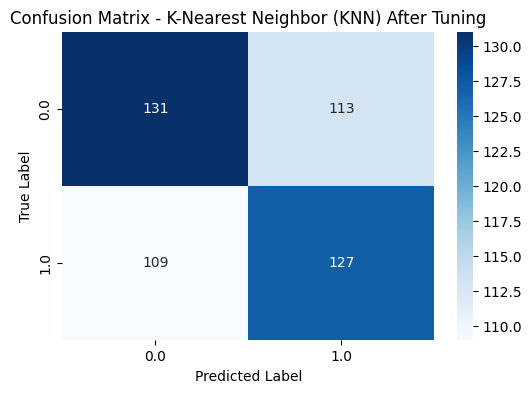

In [36]:
# Menggunakan model terbaik hasil tuning
best_knn_tuned = grid_search_knn.best_estimator_

# Evaluasi model KNN setelah tuning
evaluate_model_with_confusion_matrix(best_knn_tuned, X_test, y_test, model_name="K-Nearest Neighbor (KNN) After Tuning")

---

## **10. Menyimpan Model**

Kita akan menyimpan model Decision Tree, model terbaik sebelum tuning (KNN awal), dan model terbaik setelah tuning (KNN hasil tuning) menggunakan `joblib.dump`.

In [37]:
# Save the Decision Tree model
joblib.dump(dt_model, "decision_tree_model.h5")
print("Decision Tree model saved as decision_tree_model.h5")

# Save the best model before tuning (initial KNN)
joblib.dump(knn_model, "explore_KNN_classification.joblib")
print("Best model before tuning (KNN) saved as explore_KNN_classification.joblib")

# Save the best model after tuning (tuned KNN)
joblib.dump(grid_search_knn.best_estimator_, "tuning_classification.joblib")
print("Best model after tuning (tuned KNN) saved as tuning_classification.joblib")

Decision Tree model saved as decision_tree_model.h5
Best model before tuning (KNN) saved as explore_KNN_classification.joblib
Best model after tuning (tuned KNN) saved as tuning_classification.joblib


---

## **11. Ringkasan Hasil Evaluasi dan Tuning**

Berikut adalah rangkuman dari seluruh proses evaluasi dan tuning model klasifikasi.

In [38]:
print("--- Ringkasan Hasil Evaluasi dan Tuning Model Klasifikasi ---")

# 1. Perbandingan Performa Model Awal
print("\n1. Perbandingan Performa Model Awal:")
print(f"   - Naïve Bayes (NBC):    Akurasi={nb_accuracy:.2f}%, Precision={nb_precision:.2f}%, Recall={nb_recall:.2f}%, F1-Score={nb_f1:.2f}%. Menunjukkan kesulitan dalam memprediksi kelas 1.")
print(f"   - K-Nearest Neighbors (KNN - awal): Akurasi={knn_accuracy:.2f}%, Precision={knn_precision:.2f}%, Recall={knn_recall:.2f}%, F1-Score={knn_f1:.2f}%. Performa lebih seimbang dibandingkan NBC.")
print(f"   - Decision Tree (awal): Akurasi={dt_accuracy:.2f}%, Precision={dt_precision:.2f}%, Recall={dt_recall:.2f}%, F1-Score={dt_f1:.2f}%. Performa sedikit di bawah KNN awal.")

# 2. Model Terbaik Sebelum Tuning
print("\n2. Model Terbaik Sebelum Tuning:")
print("   - Berdasarkan metrik evaluasi awal, model K-Nearest Neighbor (KNN) adalah model dengan performa terbaik.")

# 3. Dampak Hyperparameter Tuning pada KNN
print("\n3. Dampak Hyperparameter Tuning pada KNN:")
print("   - Tuning dilakukan pada model KNN menggunakan GridSearchCV.")
print(f"   - Parameter terbaik yang ditemukan: {grid_search_knn.best_params_}.")
print("   - Performa model KNN setelah tuning tidak menunjukkan peningkatan yang signifikan dibandingkan sebelum tuning.")

# 4. Performa Akhir Model KNN Setelah Tuning
tuned_knn_y_pred = best_knn_tuned.predict(X_test)
tuned_knn_accuracy = accuracy_score(y_test, tuned_knn_y_pred) * 100
tuned_knn_precision = precision_score(y_test, tuned_knn_y_pred, average='weighted', zero_division=0) * 100
tuned_knn_recall = recall_score(y_test, tuned_knn_y_pred, average='weighted', zero_division=0) * 100
tuned_knn_f1 = f1_score(y_test, tuned_knn_y_pred, average='weighted', zero_division=0) * 100

print("\n4. Performa Akhir Model KNN Setelah Tuning:")
print(f"   - Akurasi: {tuned_knn_accuracy:.2f}%")
print(f"   - Precision: {tuned_knn_precision:.2f}%")
print(f"   - Recall: {tuned_knn_recall:.2f}%")
print(f"   - F1-Score: {tuned_knn_f1:.2f}%")
print("   - Performa model KNN yang sudah di-tuning menunjukkan konsistensi tetapi masih relatif rendah, mengindikasikan kesulitan dalam memisahkan klaster dengan jelas menggunakan fitur yang ada.")


# 5. Kesimpulan dan Langkah Selanjutnya
print("\n5. Kesimpulan dan Langkah Selanjutnya:")
print("   - Model-model yang dievaluasi (NBC, KNN awal, Decision Tree, dan KNN hasil tuning) mencapai performa klasifikasi yang relatif rendah, sedikit di atas akurasi acak.")
print("   - NBC sangat terpengaruh oleh ketidakseimbangan kelas.")
print("   - KNN menunjukkan performa paling seimbang tetapi tuning tidak memberikan peningkatan yang signifikan.")
print("   - Langkah-langkah selanjutnya yang potensial untuk meningkatkan performa meliputi:")
print("     - Mengatasi ketidakseimbangan kelas menggunakan teknik seperti SMOTE atau undersampling.")
print("     - Melakukan eksplorasi fitur (Feature Engineering) untuk menciptakan fitur yang lebih deskriminatif.")
print("     - Mengevaluasi algoritma klasifikasi lain atau metode ensemble.")
print("     - Melakukan tuning hyperparameter yang lebih mendalam atau mencoba metode tuning lainnya.")

--- Ringkasan Hasil Evaluasi dan Tuning Model Klasifikasi ---

1. Perbandingan Performa Model Awal:
   - Naïve Bayes (NBC):    Akurasi=50.83%, Precision=25.84%, Recall=50.83%, F1-Score=34.26%. Menunjukkan kesulitan dalam memprediksi kelas 1.
   - K-Nearest Neighbors (KNN - awal): Akurasi=53.75%, Precision=53.78%, Recall=53.75%, F1-Score=53.75%. Performa lebih seimbang dibandingkan NBC.
   - Decision Tree (awal): Akurasi=47.08%, Precision=47.09%, Recall=47.08%, F1-Score=47.09%. Performa sedikit di bawah KNN awal.

2. Model Terbaik Sebelum Tuning:
   - Berdasarkan metrik evaluasi awal, model K-Nearest Neighbor (KNN) adalah model dengan performa terbaik.

3. Dampak Hyperparameter Tuning pada KNN:
   - Tuning dilakukan pada model KNN menggunakan GridSearchCV.
   - Parameter terbaik yang ditemukan: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}.
   - Performa model KNN setelah tuning tidak menunjukkan peningkatan yang signifikan dibandingkan sebelum tuning.

4. Performa Akh